# **Vietnamese currency**
**HỌ VÀ TÊN:** Nguyễn Trọng Đại

**MSSV:** 19146146

**LỚP:** AI-CLC-ST4

**GITHUB / KAGGLE**

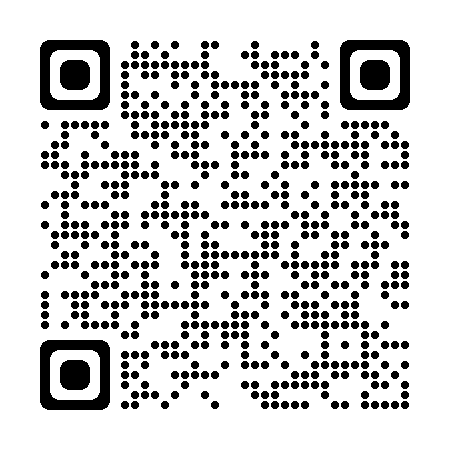
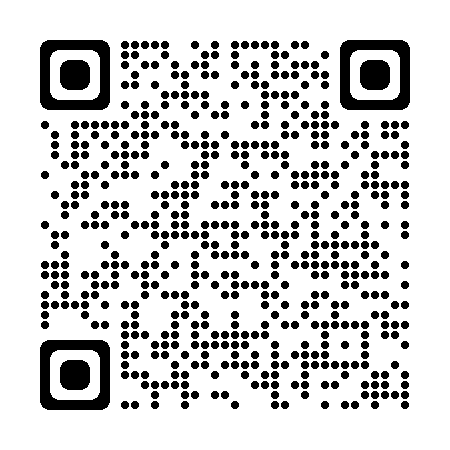


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
def loadData():
    file = open('/content/drive/MyDrive/Colab Notebooks/CNN/BaiTap/vietnamese-money-recognition/dataset/vietnamese_currency.data', 'rb')
    (images, labels) = pickle.load(file)
    file.close()
    print(images.shape)
    print(labels.shape)
    return images, labels

In [ ]:
X,y = loadData()
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=100)

(2712, 128, 128, 3)
(2712, 12)


In [ ]:
aug = ImageDataGenerator(rotation_range=20, zoom_range=0.1,
        rescale=1./255,
        width_shift_range=0.1,
        height_shift_range=0.1,
        horizontal_flip=True,
        brightness_range=[0.2,1.5], fill_mode="nearest")

In [ ]:
# Create model using Sequential API
model = tf.keras.Sequential()
model.add(tf.keras.Input(shape=(128,128,3)))
model.add(layers.Conv2D(256, (3,3), padding="same", activation='relu', kernel_initializer='he_uniform'))
model.add(layers.MaxPool2D((2,2), strides=(2,2)))

model.add(layers.Conv2D(128, (3,3), padding="same", activation='relu', kernel_initializer='he_uniform'))
model.add(layers.MaxPool2D((2,2), strides=(2,2)))

model.add(layers.Conv2D(64, (3,3), padding="same", activation='relu', kernel_initializer='he_uniform'))
model.add(layers.MaxPool2D((2,2), strides=(2,2)))

model.add(layers.Flatten())
model.add(layers.Dense(4096, activation='relu'))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(4096, activation='relu'))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(12))
model.add(layers.Softmax())

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# Training
history = model.fit(aug.flow(X_train, y_train, batch_size=128), epochs=45,validation_data=aug.flow(X_test, y_test, batch_size=128), verbose=1)
model.save("model.h5")

Epoch 1/45
17/17 [==============================] - 30s 944ms/step - loss: 6.4788 - accuracy: 0.1125 - val_loss: 2.4017 - val_accuracy: 0.1989
Epoch 2/45
17/17 [==============================] - 13s 769ms/step - loss: 2.3006 - accuracy: 0.2125 - val_loss: 2.1625 - val_accuracy: 0.2744
Epoch 3/45
17/17 [==============================] - 13s 761ms/step - loss: 2.0996 - accuracy: 0.2868 - val_loss: 2.0538 - val_accuracy: 0.2983
Epoch 4/45
17/17 [==============================] - 13s 766ms/step - loss: 1.9317 - accuracy: 0.3213 - val_loss: 1.9900 - val_accuracy: 0.3057
Epoch 5/45
17/17 [==============================] - 13s 767ms/step - loss: 1.8559 - accuracy: 0.3573 - val_loss: 1.7885 - val_accuracy: 0.3775
Epoch 6/45
17/17 [==============================] - 13s 764ms/step - loss: 1.6892 - accuracy: 0.4163 - val_loss: 1.6313 - val_accuracy: 0.4328
Epoch 7/45
17/17 [==============================] - 13s 764ms/step - loss: 1.5923 - accuracy: 0.4537 - val_loss: 1.6091 - val_accuracy: 0.4420

In [ ]:
score = model.evaluate(X_test, y_test, verbose=2)
print("Loss = ", score[0])
print("Accuracy = ", score[1])

17/17 - 1s - loss: 66.5277 - accuracy: 0.7569 - 1s/epoch - 69ms/step
Loss =  66.52767944335938
Accuracy =  0.7569060921669006


In [ ]:
modelH5 = tf.keras.models.load_model("model.h5")

In [ ]:
labels = ['Không có tiền', '200đ', '500đ', '1000đ', '2000đ', '5000đ', '10000đ', '20000đ', '50000đ', '100000đ', '200000đ', '500000đ']

'2000đ'

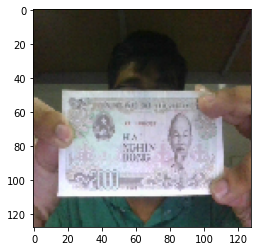

In [ ]:
img = load_img("/content/test_2k_1.png", target_size=(128,128))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,128,128,3)
img = img.astype('float32')
labels[np.argmax(modelH5.predict(img), axis=1)[0]]